# Plotting
### some neuroscience data
26 June 2023<br>
NRSC 7657<br>
Daniel J Denman and John Thompson<br>
University of Colorado Anschutz<br>
<br>

We'll start with the workhorse of plotting, matplotlib. It has flexibility and deep functionality, and many other packages rely on it in some way. If they don't they are going to end up doing the drawing, managing what your graphics card does directly, often then relying on `PyQt`. All of these have to eventually converge there, as all things that have a graphical component do.[This is mostly trivia, but may come in handdy] 

import syntax:

In [1]:
import matplotlib.pyplot as plt

The terminology:

![matplotlib anatomy](https://matplotlib.org/stable/_images/anatomy.png)
<br>
https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

https://matplotlib.org/stable/gallery/index.html
<br>let's grab some data first

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('../Week2/iris.csv')

In [6]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Figures and Axes


(0.0, 0.5)

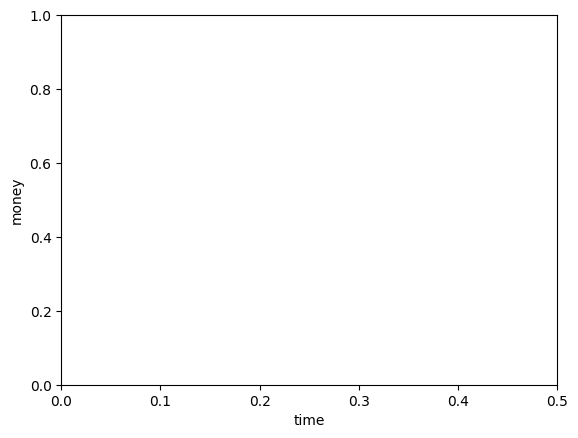

In [10]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel('time')
ax.set_ylabel('money')
ax.set_xlim(0,0.5)

## Axis

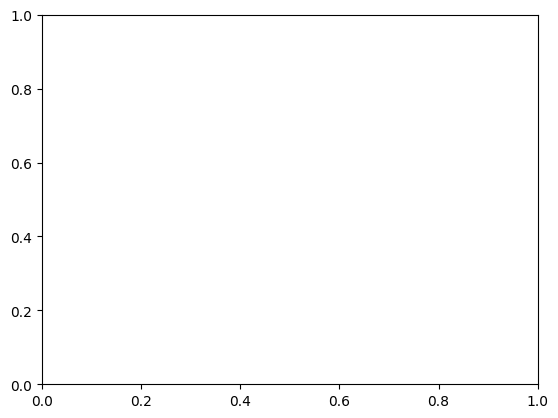

In [11]:
fig, ax = plt.subplots(1,1)
ax.tick_params(axis='x',which='minor',labelsize=4)

## Artist
everything is an Artist, these are the entities that get drawn. `Figures` and `Axes` are Artists; other things (lines, shapes, labels, text) are associated with a particular axis

### The plot object

(7.0, 8.0)

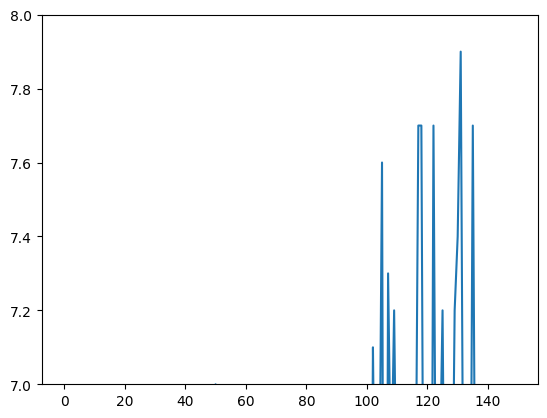

In [15]:
fig, ax = plt.subplots(1,1)
plt.plot(df['sepal.length'])
ax.set_ylim(7.0,8.0)

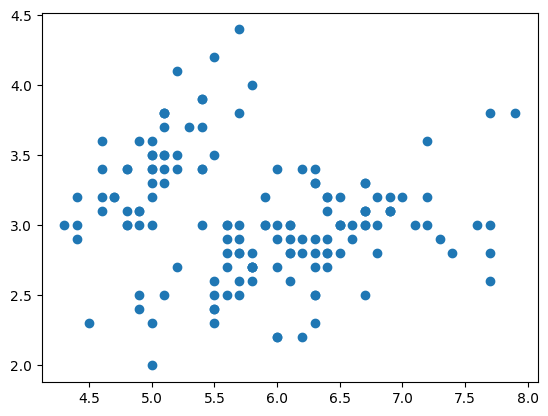

In [18]:
fig, ax = plt.subplots(1,1)
plt.scatter(df['sepal.length'],df['sepal.width'])

## a note on backends

In [19]:
import matplotlib

In [20]:
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

In [21]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'webagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [31]:
%matplotlib inline

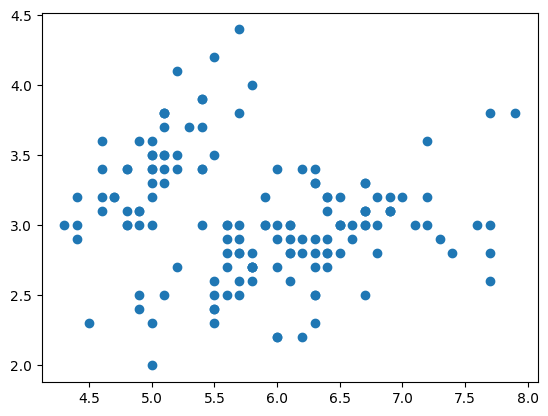

In [32]:
fig, ax = plt.subplots(1,1)
plt.scatter(df['sepal.length'],df['sepal.width'])

### changing plot parameters

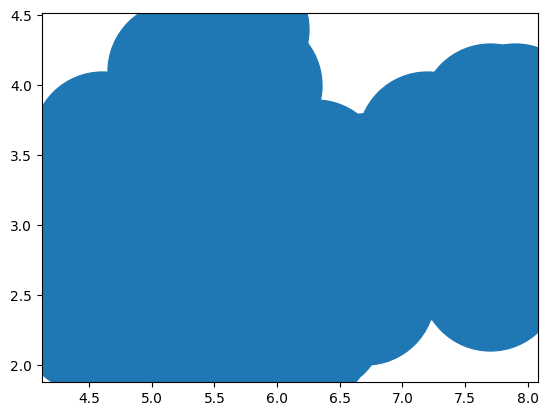

In [49]:
plt.plot(df['sepal.length'],df['sepal.width'],markersize=100,marker='o')

### multiple plots at once

separate plots for each set of axes

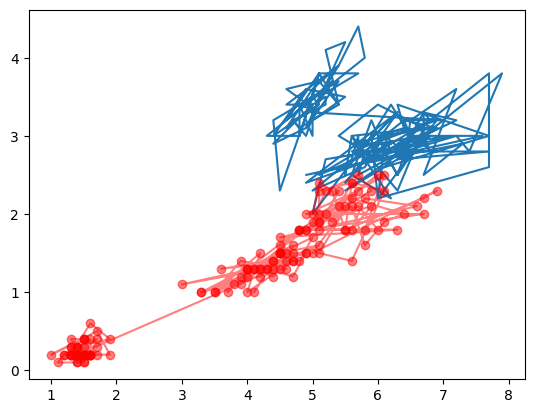

plots on the same axes:

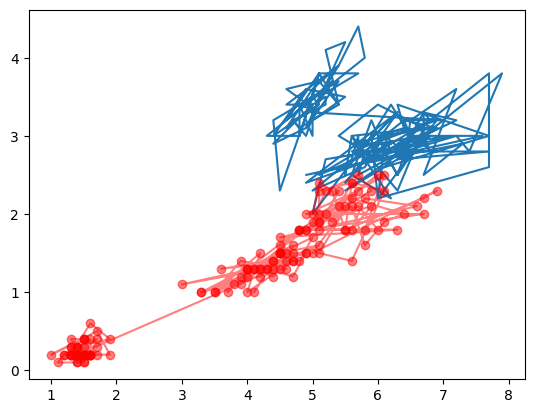

In [56]:
plt.plot(df['sepal.length'],df['sepal.width'])
plt.plot(df['petal.length'],df['petal.width'],marker='o',alpha=0.5,color=(1,0,0))

one plot figure with multiple axes

In [66]:
type(fig)

matplotlib.figure.Figure

Text(0.5, 1.0, 'petall')

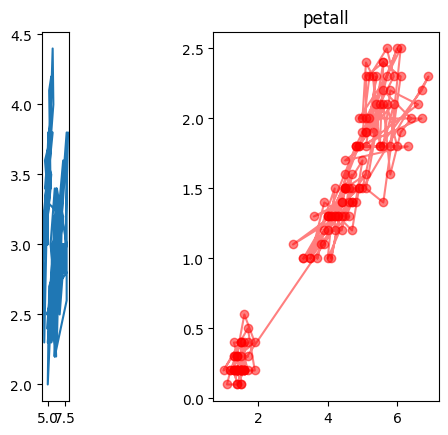

In [72]:
fig,axes = plt.subplots(1,2)
axes[0].plot(df['sepal.length'],df['sepal.width'])
axes[1].plot(df['petal.length'],df['petal.width'],marker='o',alpha=0.5,color=(1,0,0))
axes[0].set_aspect(20)
axes[1].set_title('petall')

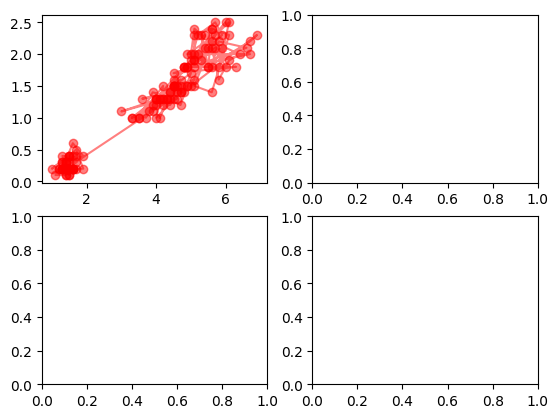

In [76]:
fig, axes = plt.subplots(2,2)
axes[0][0].plot(df['petal.length'],df['petal.width'],marker='o',alpha=0.5,color=(1,0,0))

### image, or any 2D plotting

In [77]:
import numpy as np

In [78]:
im = np.array([[1,2],[3,4]])

In [79]:
im

array([[1, 2],
       [3, 4]])

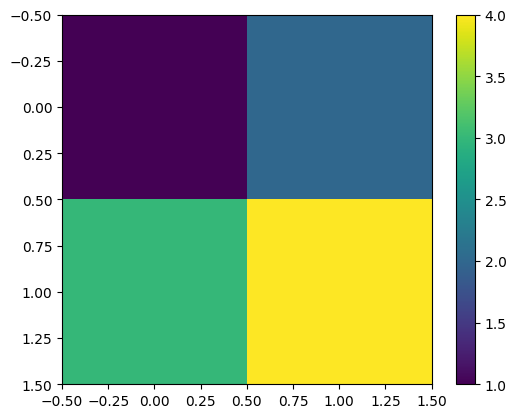

In [83]:
plt.imshow(im,cmap=plt.cm.viridis)
plt.colorbar()

In [84]:
im2 = plt.imread('../Week2/forNRSC7657.png')

In [92]:
im2[:,:,3] = 0.5

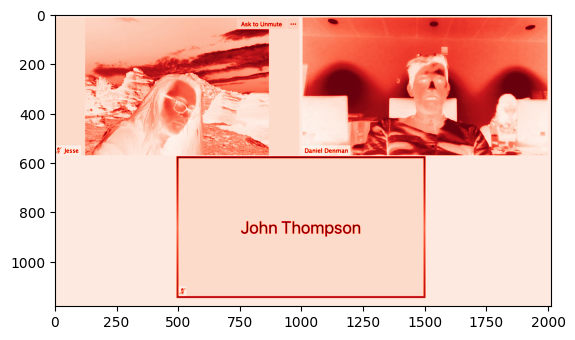

In [95]:
plt.imshow(im2[:,:,0],plt.cm.Reds)

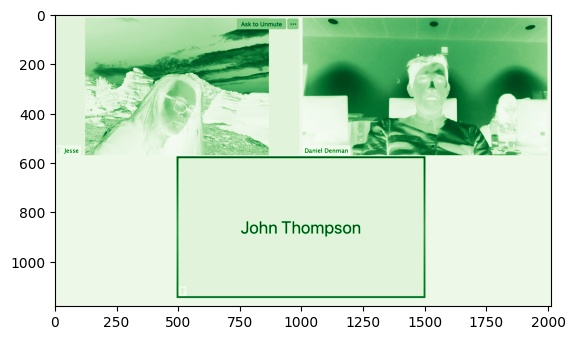

In [96]:
plt.imshow(im2[:,:,1],plt.cm.Greens)

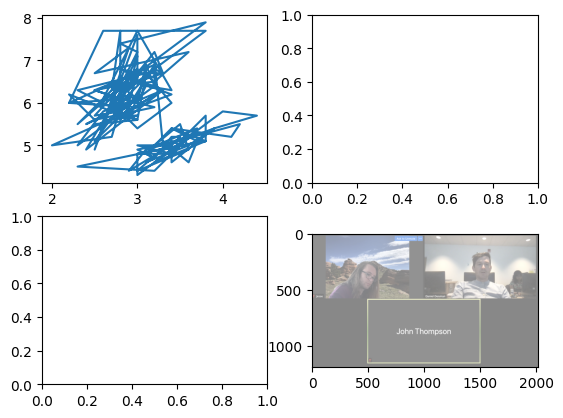

In [99]:
fig, ax = plt.subplots(2,2)
ax[0][0].plot(df['sepal.width'],df['sepal.length'])
ax[1][1].imshow(im2)

## matplotlib 3d plots

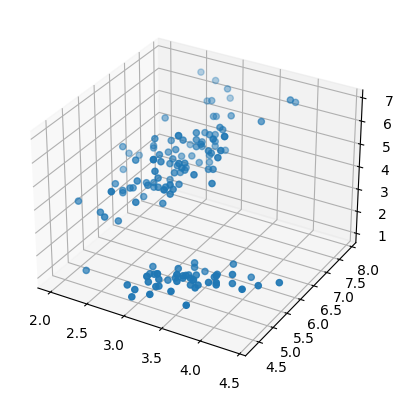

In [100]:
f = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df['sepal.width'],df['sepal.length'],df['petal.length'])

## Seaborn
built on top of matplotib, makes nice plots and works natively with `pandas` `DataFrame`s

In [101]:
import seaborn as sns

In [102]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<Axes: xlabel='sepal.length', ylabel='sepal.width'>

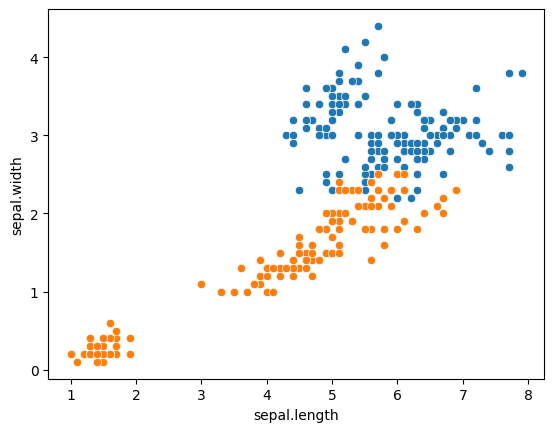

In [104]:
sns.scatterplot(data=df,x='sepal.length',y='sepal.width')
sns.scatterplot(data=df,x='petal.length',y='petal.width')

<Axes: xlabel='variety', ylabel='petal.length'>

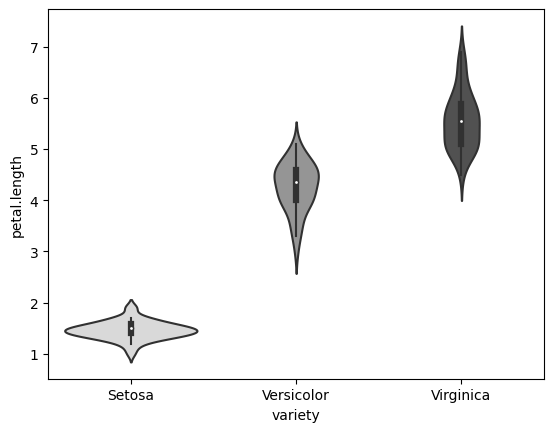

In [116]:
sns.violinplot(df,x='variety',y='petal.length')

## palettes

In [108]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [114]:
sns.color_palette('Greys',5)

[(0.9125259515570934, 0.9125259515570934, 0.9125259515570934),
 (0.7777777777777778, 0.7777777777777778, 0.7777777777777778),
 (0.586082276047674, 0.586082276047674, 0.586082276047674),
 (0.40784313725490196, 0.40784313725490196, 0.40784313725490196),
 (0.2011534025374856, 0.2011534025374856, 0.2011534025374856)]

In [115]:
sns.set_palette(sns.color_palette('Greys',3))

## ipywidgets and interactive plotting

In [45]:
!conda install nodejs -y
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /Users/danieljdenman/opt/anaconda3/envs/NRSC7657_2023

  added / updated specs:
    - nodejs


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libuv-1.44.2               |       h6c40b1e_0         388 KB
    nodejs-18.16.0             |       he8a3799_0        11.7 MB
    ------------------------------------------------------------
                                           Total:        12.0 MB

The following NEW packages will be INSTALLED:

  libuv              pkgs/main/osx-64::libuv-1.44.2-h6c40b1e_0 

The following packages will b

In [46]:
import ipywidgets as widgets

In [47]:
x1 = widgets.IntSlider(description='x max',continuos_update=True)
y1 = widgets.IntSlider(description='y max',continuos_update=True)
widgets.VBox([x1,y1])

In [ ]:
@widgets.interact(x1=7,y1=7)
def iris_scatter(x1,y1):
    f,ax = plt.subplots(1,1)
    ax.plot(df.sepallength,df.sepalwidth,marker='<',markersize=12,color='b')
    ax.plot(df.petallength,df.petalwidth,marker='o',markersize=3,color='red',alpha=0.2)
    
    ax.set_xlim(0,x1)
    ax.set_ylim(0,y1)
    

## Bokeh
https://demo.bokeh.org/

In [117]:
from bokeh.plotting import figure, show


In [118]:
p=figure()

In [119]:
p.circle(df['sepal.width'],df['sepal.length'])

GlyphRenderer(id='p1035', ...)

In [120]:
show(p)